### Lab 5
#### Author: Ceyda Durmaz
#### Date: 12/07/2020
##### Link to GitHub repository: https://github.com/cdurmaz569/Data_Science_I_Lab/tree/master/Lab_5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')

### Problem 1

##### Problem 1a

In [3]:
from sklearn.datasets.samples_generator import make_blobs

# Generate simulated dataset with 20 observations in each of 3 classes 
# and 50 variables
X, y_true = make_blobs(n_samples = 60, 
                       n_features = 50, 
                       centers = 3, 
                       random_state = 1)

##### Problem 1b

col_0   0   1   2
row_0            
0       0  20   0
1      20   0   0
2       0   0  20


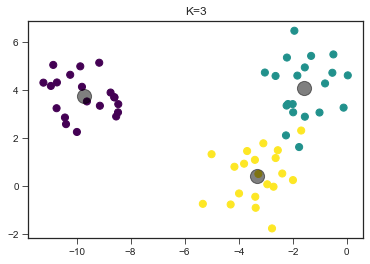

In [4]:
from sklearn.cluster import KMeans

# Perform K-means clustering of observations with K=3
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(X)
y_kmeans3 = kmeans3.predict(X)

# Output contingency table of results
print(pd.crosstab(y_kmeans3, 
                  y_true,
                  margins = False))

# Plot cluster
plt.scatter(X[:,0], X[:,1], 
            c = y_kmeans3, 
            s = 50, 
            cmap = "viridis");
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:,0], 
            centers3[:,1], 
            c = 'black', 
            s = 200, alpha = 0.5);
plt.title("K=3");

When K=3, all clusters match the true class labels. 

##### Problem 1c

col_0   0   1   2
row_0            
0      20  20   0
1       0   0  20


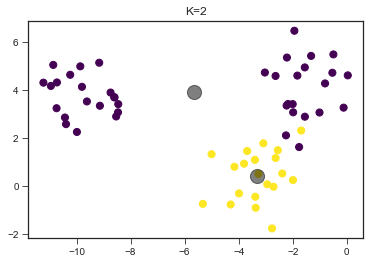

In [5]:
# Perform K-means clustering with K=2
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)

# Output contingency table of results
print(pd.crosstab(y_kmeans2, 
                  y_true,
                  margins = False))

# Plot cluster
plt.scatter(X[:,0], X[:,1], 
            c = y_kmeans2, 
            s = 50, 
            cmap = "viridis");
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:,0], 
            centers2[:,1], 
            c = 'black', 
            s = 200, alpha = 0.5);
plt.title("K=2");

When K=2, the middle class (true class 1) is forced into a wrong class (observed class 1 instead of 2). The other two classes (true class 0 and 2) are classified correctly. 

##### Problem 1d

col_0   0   1   2
row_0            
0       0   0   7
1      20   0   0
2       0  20   0
3       0   0  13


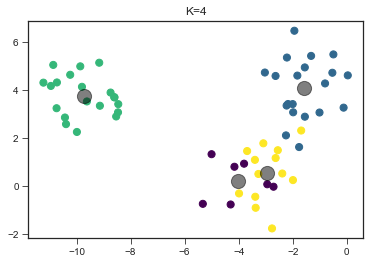

In [6]:
# Perform K-means clustering with K=4
kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(X)
y_kmeans4 = kmeans4.predict(X)

# Output contingency table of results
print(pd.crosstab(y_kmeans4, 
                  y_true,
                  margins = False))

# Plot cluster
plt.scatter(X[:,0], X[:,1], 
            c = y_kmeans4, 
            s = 50, 
            cmap = "viridis");
centers4 = kmeans4.cluster_centers_
plt.scatter(centers4[:,0], 
            centers4[:,1], 
            c = 'black', 
            s = 200, alpha = 0.5);
plt.title("K=4");

When K-4, one of the classes (true class 1) becomes split across two classes (observed class 0 and 3). The other two classes (true class 0 and 2) are classified correctly. 

##### Problem 1e

col_0   0   1   2
row_0            
0       0  20   0
1       0   0  20
2      20   0   0


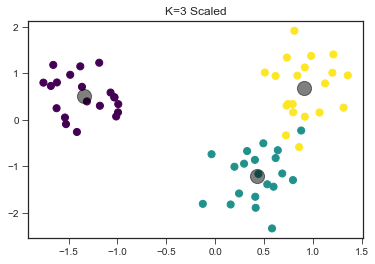

In [7]:
from sklearn.preprocessing import StandardScaler
# Perform k-means clustering with K=3 on data after scaling each variable
# to have standard deviation of one
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(X_scaled)
y_kmeans3 = kmeans3.predict(X_scaled)

# Output contingency table of results
print(pd.crosstab(y_kmeans3, 
                  y_true,
                  margins = False))

# Plot cluster
plt.scatter(X_scaled[:,0], X_scaled[:,1], 
            c = y_kmeans3, 
            s = 50, 
            cmap = "viridis");
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:,0], 
            centers3[:,1], 
            c = 'black', 
            s = 200, alpha = 0.5);
plt.title("K=3 Scaled");

The results are the same as those obatined in 1c. Scaling does not change the results. 

### Problem 2

##### Problem 2a

In [8]:
# Load gene expression data
gex = pd.read_csv("Ch10Ex11.csv", header = None)

# Transpose index and columns
gexT = gex.T

##### Problem 2b

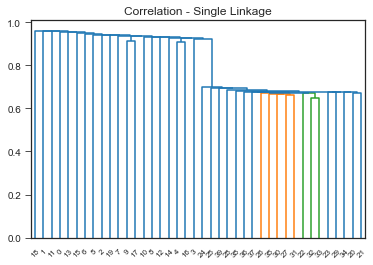

In [9]:
import scipy.cluster.hierarchy as shc

# Apply hierarchical clustering to the samples and plot dendograms
## Correlation - Single Linkage
corrSingLink = shc.dendrogram(shc.linkage(gexT, 
                                          method= "single", 
                                          metric = "correlation"))
plt.title("Correlation - Single Linkage");

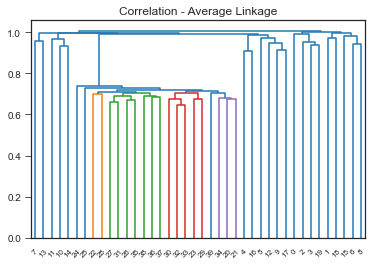

In [10]:
## Correlation - Average Linkage
corrAvgLink = shc.dendrogram(shc.linkage(gexT, 
                                         method= "average", 
                                         metric = "correlation"))
plt.title("Correlation - Average Linkage");

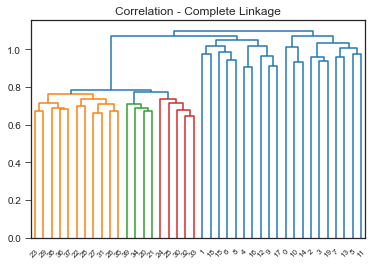

In [11]:
## Correlation - Complete Linkage
corrCompLink = shc.dendrogram(shc.linkage(gexT, 
                                          method= "complete", 
                                          metric = "correlation"))
plt.title("Correlation - Complete Linkage");

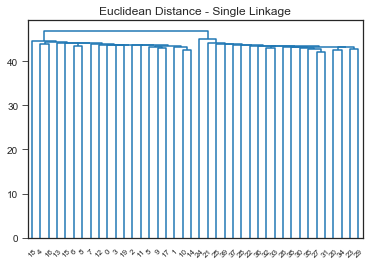

In [12]:
## Euclidean Distance - Single Linkage
eucSingLink = shc.dendrogram(shc.linkage(gexT, 
                                         method= "single", 
                                         metric = "euclidean", ))
plt.title("Euclidean Distance - Single Linkage");

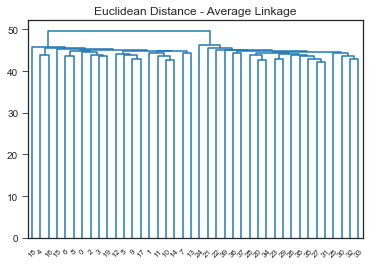

In [13]:
## Euclidean Distance - Average Linkage
eucAvgLink = shc.dendrogram(shc.linkage(gexT, 
                                        method= "average", 
                                        metric = "euclidean", ))
plt.title("Euclidean Distance - Average Linkage");

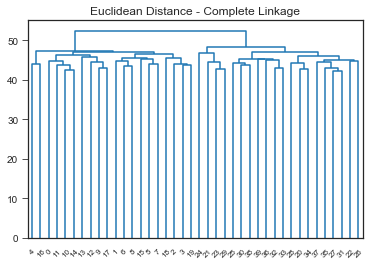

In [14]:
## Euclidean Distance - Complete Linkage
eucCompLink = shc.dendrogram(shc.linkage(gexT, 
                                         method= "complete", 
                                         metric = "euclidean"))
plt.title("Euclidean Distance - Complete Linkage");

The genes are able to separate the patient samples into two groups. The two "disimilarity" metrics utilized, correlation and Euclidean distance, both grouped healthy patients and diseased group but displayed some differences. 
As the correlation metric is scale invariant, the correlation dendograms account for differences in the gene expression by group. Meanwhile, Euclidean shows a clearer divide on larger differences between the sample groups, but has less sensitivity for smaller differences between samples within the two groups as it is dependent on units. 
Linkage is responsible for defining the dissimilarity between two groups of observations, and thus enables the sensitivity for cluster determination. Single linkage shows the least dissmiliarity within a cluster, complete linkage shows the most dissimilarity, and average linkage shows the mean dissimilarity.

